## TD6 : Programmer un Perceptron

### 1. Exemple simple : classification des points et des étoiles en 2D

Nous avons deux classes, les étoiles et les cercles, d'objets dans l'espace bidimensionnel. Nous recherchons l'hyperplan qui sépare les deux classes. Les coordonnées des étoiles sont : $x(1) = (-2,1), x(2) = (1,1), x(3) = (1.5,-0.5)$. Les coordonnées des cercles sont : $x(4) = (-2,-1), x(5) = (-1,-1.5), x(6) = (2,-2)$. Disons que la sortie souhaitée pour les étoiles est +1 et pour les cercles -1. 

Le vecteur de poids initial est $w = (0,1,0.5)$ et le taux d'apprentissage est $\eta = 0.2$. 



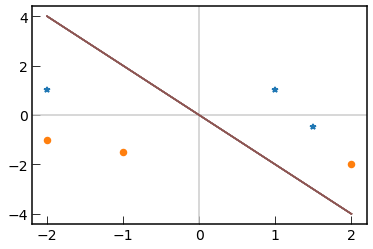

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

eta = 0.2

w = np.array([0,1.,0.5])
# donnée, structure : [numéro, sortie souhaitée, coordonnées],[...],...
x = [[1,+1,np.array([1,-2,1])],\
     [2,+1,np.array([1,1,1])],\
     [3,+1,np.array([1,1.5,-0.5])],\
     [4,-1,np.array([1,-2,-1])],\
     [5,-1,np.array([1,-1,-1.5])],\
     [6,-1,np.array([1,2,-2])],
    ]

# représentation graphique
plt.axhline(y=0,c='0.8') # trait horizontal
plt.axvline(x=0,c='0.8') # trait vertical

# pour tracer la ligne de séparation initiale
x1 = np.linspace(-2,2,1000)
x2 = -(w[0] + w[1]*x1)/w[2]

for i in range(len(x)):
    plt.plot(x1,x2)
    if x[i][1]==1 :
        plt.plot(x[i][2][1],x[i][2][2],'*',c='C0')
    elif x[i][1]==-1 :
        plt.plot(x[i][2][1],x[i][2][2],'o',c='C1')

#### E1 Programmer le perceptron sur l'exemple 

Mettre en œuvre l'algorithme d'apprentissage Perceptron pour l'exemple ci-dessus (considéré en classe). 

0 [0.  0.2 1.1] 2 0.3333333333333333
1 [0.2 0.5 1. ] 1 0.16666666666666666
2 [0.2 0.5 1. ] 0 0.0


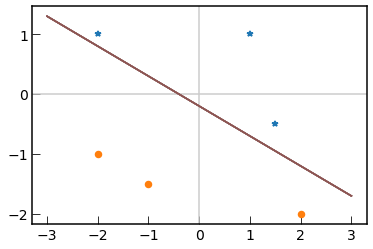

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

eta = 0.2

w = np.array([0,1.,0.5])
# donnée, structure : [numéro, sortie souhaitée, coordonnées],[...],...
x = [[1,+1,np.array([1,-2,1])],\
     [2,+1,np.array([1,1,1])],\
     [3,+1,np.array([1,1.5,-0.5])],\
     [4,-1,np.array([1,-2,-1])],\
     [5,-1,np.array([1,-1,-1.5])],\
     [6,-1,np.array([1,2,-2])],
    ]

# première boucle : répétitions de la formation 
for n in range(1000):
    incorrect = 0
    # deuxième boucle sur tout le point de l'ensemble d'entrée
    for i in range(len(x)):
        #print(i)
        z = np.sum(x[i][2]*w)
        if np.sign(z) != x[i][1]:
            w = w + eta*x[i][1]*x[i][2]
            incorrect+=1
    print(n,w,incorrect,incorrect/len(x))
    if incorrect==0:
        break
        
# représentation graphique #############################################
# pour tracer la ligne de séparation
x1 = np.linspace(-3,3,1000)
x2 = -(w[0] + w[1]*x1)/w[2]


plt.axhline(y=0,c='0.8') # trait horizontal
plt.axvline(x=0,c='0.8') # trait vertical

for i in range(len(x)):
    plt.plot(x1,x2)
    if x[i][1]==1 :
        plt.plot(x[i][2][1],x[i][2][2],'*',c='C0')
    elif x[i][1]==-1 :
        plt.plot(x[i][2][1],x[i][2][2],'o',c='C1')

### 2. Reconnaître les chiffres écrits à la main 

Utilisons la base de données MNIST de numéros manuscrits ( http://yann.lecun.com/exdb/mnist/ ). La tâche consiste à programmer un perceptron et à l'entraîner sur une paire de nombres donnée. Commençons par la paire de chiffres '0' et '1'. Les entrées sont maintenant des images de ces deux chiffres écrites à la main. La sortie souhaitée pour '0' est $-1$ et pour '1' est $+1$. 

Utilisez un vecteur de poids initial avec des zéros comme éléments. Le taux d'apprentissage est $\eta = 0.2$. 

Utilisez la classe ci-dessous pour accéder aux images MNIST. 

numbre d'images :  60000 10000
5 (28, 28)


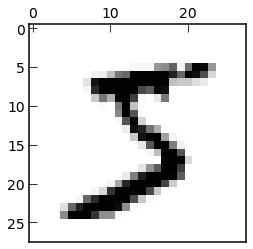

0 (28, 28)


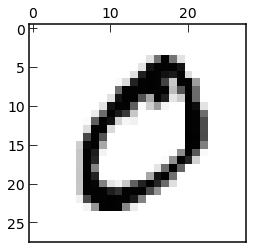

4 (28, 28)


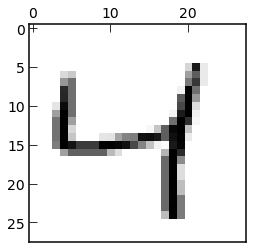

1 (28, 28)


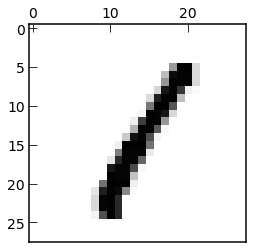

9 (28, 28)


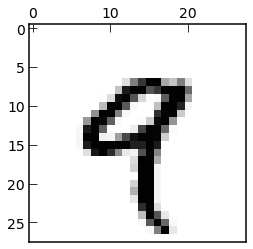

2 (28, 28)


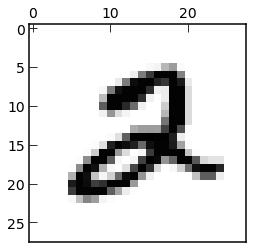

1 (28, 28)


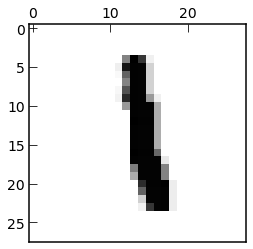

3 (28, 28)


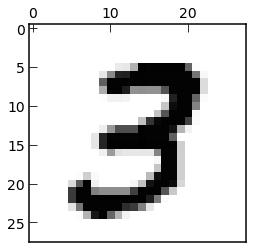

1 (28, 28)


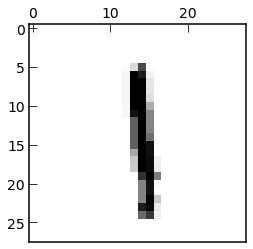

4 (28, 28)


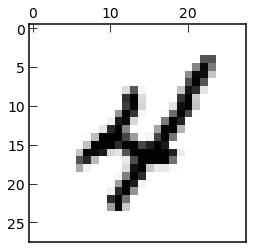

In [3]:
import numpy as np
import pickle
import itertools
import pdb

from MNISTdata.readMNIST  import readMNIST


# lire les données et invoquer la classe
trainingData = readMNIST('training')
testData = readMNIST('testing')

# obtenir les dimensions des images
imgDims = trainingData.getImgDimensions()
# nombre d'images dans l'ensemble de données d'entraînement
trainingSize = trainingData.getDSsize()
# nombre d'images dans l'ensemble de données d'essai
testSize = testData.getDSsize()
print('numbre d\'images : ', trainingSize,testSize)

# boucle sur les 10 premières images de l'ensemble des données d'entraînement
for i in range(10):
    img = trainingData.getImg(i) # obtenir l'image
    print(img[0],np.shape(img[1])) # afficher le contenu
    trainingData.showImg(img[1]) # montrer l'image

    

#### E2 Programmer un perceptron pour reconnaître les paires de chiffres écrits à la main

Utilisez le code de l'exemple simple ci-dessus. Notez que plusieurs cycles d'entraînement sont nécessaires. Suivre l'exécution de la tâche de classification.  Les images doivent être aplaties pour obtenir un vecteur unidimensionnel en entrée, utilisez la fonction de numpy ``np.ndarray.flatten(img[1])`` pour cela. 


In [7]:
import numpy as np
import pickle
import itertools

#from network import  Network
from MNISTdata.readMNIST  import readMNIST

def isDesiredOutput(currentOut,number):
    if number == classificationNumbers[0][0]:
        if currentOut == classificationNumbers[0][1]:
            return [True,classificationNumbers[0][1]]
        else:
            return [False,classificationNumbers[0][1]]
    elif number == classificationNumbers[1][0]:
        if currentOut == classificationNumbers[1][1]:
            return [True,classificationNumbers[1][1]]
        else:
            return [False,classificationNumbers[1][1]]
    else:
        print('problem')

    

# parameters
trainingEpochs = 50
eta = 0.2

# contains the two numbers to classify and their desired ouput 
classificationNumbers = [[0,+1],
                         [1,-1]]

# read data 
trainingData = readMNIST('training')
testData = readMNIST('testing')

# create weight vector
imgDims = trainingData.getImgDimensions()
weights = np.zeros(imgDims[0]*imgDims[1]+1)

print('Classificaiton between %s and %s' % (classificationNumbers[0][0],classificationNumbers[1][0]))
print('Train on %s samples, test on %s samples.' % (trainingData.getDSsize()*len(classificationNumbers)/10, testData.getDSsize()*len(classificationNumbers)/10))

learningProgress = []
# learning 
for n in range(trainingEpochs):
    nMissclassified = 0
    nCorrectlyClassified = 0
    for i in range(trainingData.getDSsize()):
        img = trainingData.getImg(i)
        inputPatternPrime = np.concatenate((([1]),np.ndarray.flatten(img[1]))) # add a '1' to the input vector
        if img[0] in [classificationNumbers[0][0],classificationNumbers[1][0]]:
            currentOutput = np.sign(np.sum(weights*inputPatternPrime))
            evaluation = isDesiredOutput(currentOutput, img[0])
            if evaluation[0]:
                nCorrectlyClassified += 1
            else:
                nMissclassified+=1
                weights = weights + eta*evaluation[1]*inputPatternPrime
    # save performance of learning epoch
    learningProgress.append([nMissclassified,nCorrectlyClassified])
    print('Learning epoch %s/%s ..... %s %% error rate in %s samples' % ((n+1),trainingEpochs,nMissclassified*100./float(nCorrectlyClassified+nMissclassified),(nCorrectlyClassified+nMissclassified)))
    if nMissclassified == 0:
        break


# testing
nTestMissclassified = 0
nTestCorrectlyClassified = 0
for i in range(testData.getDSsize()):
    img = testData.getImg(i)
    inputPatternPrime = np.concatenate((([1]),np.ndarray.flatten(img[1])))
    if img[0] in [classificationNumbers[0][0],classificationNumbers[1][0]]:
        currentOutput = np.sign(np.sum(weights*inputPatternPrime))
        evaluation = isDesiredOutput(currentOutput, img[0])
        if evaluation[0]:
            nTestCorrectlyClassified += 1
        else:
            nTestMissclassified+=1

print('')
print('Test data set ..... %s %% error rate in %s samples' % (nTestMissclassified*100./float(nTestCorrectlyClassified+nTestMissclassified),(nTestCorrectlyClassified+nTestMissclassified)))


pickle.dump( learningProgress, open( "learningProgress.p", "wb" ) )
pickle.dump( [nTestMissclassified,nTestCorrectlyClassified], open("testPerformance.p", "wb") )

Classificaiton between 0 and 1
Train on 12000.0 samples, test on 2000.0 samples.
Learning epoch 1/50 ..... 0.3316225819186735 % error rate in 12665 samples
Learning epoch 2/50 ..... 0.18160284247927358 % error rate in 12665 samples
Learning epoch 3/50 ..... 0.1342281879194631 % error rate in 12665 samples
Learning epoch 4/50 ..... 0.1342281879194631 % error rate in 12665 samples
Learning epoch 5/50 ..... 0.10264508487958941 % error rate in 12665 samples
Learning epoch 6/50 ..... 0.07106198183971575 % error rate in 12665 samples
Learning epoch 7/50 ..... 0.02368732727990525 % error rate in 12665 samples
Learning epoch 8/50 ..... 0.0473746545598105 % error rate in 12665 samples
Learning epoch 9/50 ..... 0.11054086063955784 % error rate in 12665 samples
Learning epoch 10/50 ..... 0.07895775759968417 % error rate in 12665 samples
Learning epoch 11/50 ..... 0.0473746545598105 % error rate in 12665 samples
Learning epoch 12/50 ..... 0.02368732727990525 % error rate in 12665 samples
Learning 